In [1252]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1253]:
data = pd.read_csv('datasets/Climate.csv')

In [1254]:
data.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-02,0.0,",,S",25.8,"H,,S",NaN,NaN,22.2,",,S"
1,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-03,0.0,",,S",27.4,"H,,S",30.5,",,S",21.9,",,S"
2,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-04,0.0,",,S",28.4,"H,,S",31.1,",,S",20.8,",,S"
3,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-05,0.0,",,S",28.7,"H,,S",32.1,",,S",18.5,",,S"
4,CEM00043441,"KURUNEGALA, CE",7.467,80.367,116.0,2019-01-06,0.0,",,S",28.0,"H,,S",31.0,",,S",21.5,",,S"


In [1255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          8745 non-null   object 
 1   NAME             8745 non-null   object 
 2   LATITUDE         8745 non-null   float64
 3   LONGITUDE        8745 non-null   float64
 4   ELEVATION        8745 non-null   float64
 5   DATE             8745 non-null   object 
 6   PRCP             8708 non-null   float64
 7   PRCP_ATTRIBUTES  8708 non-null   object 
 8   TAVG             8745 non-null   float64
 9   TAVG_ATTRIBUTES  8745 non-null   object 
 10  TMAX             7786 non-null   float64
 11  TMAX_ATTRIBUTES  7786 non-null   object 
 12  TMIN             7099 non-null   float64
 13  TMIN_ATTRIBUTES  7099 non-null   object 
dtypes: float64(7), object(7)
memory usage: 956.6+ KB


In [1256]:
data = data.drop(columns=['STATION'])

In [1257]:
data['NAME'].unique()

array(['KURUNEGALA, CE', 'CHINA BAY, CE', 'COLOMBO, CE',
       'NUWARA ELIYA, CE', 'PUTTALAM, CE'], dtype=object)

In [1258]:
values_to_drop = ['CHINA BAY, CE', 'PUTTALAM, CE'] 

# Filter the DataFrame based on the values you want to drop
data = data[~data['NAME'].isin(values_to_drop)]

In [1259]:
data['NAME'] = data['NAME'].replace('KURUNEGALA, CE', 'KURUNEGALA')
data['NAME'] = data['NAME'].replace('COLOMBO, CE', 'COLOMBO')
data['NAME'] = data['NAME'].replace('NUWARA ELIYA, CE', 'NUWARA ELIYA')

In [1260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5230 entries, 0 to 6989
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             5230 non-null   object 
 1   LATITUDE         5230 non-null   float64
 2   LONGITUDE        5230 non-null   float64
 3   ELEVATION        5230 non-null   float64
 4   DATE             5230 non-null   object 
 5   PRCP             5213 non-null   float64
 6   PRCP_ATTRIBUTES  5213 non-null   object 
 7   TAVG             5230 non-null   float64
 8   TAVG_ATTRIBUTES  5230 non-null   object 
 9   TMAX             4647 non-null   float64
 10  TMAX_ATTRIBUTES  4647 non-null   object 
 11  TMIN             4304 non-null   float64
 12  TMIN_ATTRIBUTES  4304 non-null   object 
dtypes: float64(7), object(6)
memory usage: 572.0+ KB


In [1261]:
#data['DATE'] = pd.to_datetime(data['DATE'])

In [1262]:
#data.info()

In [1263]:
data.drop('PRCP_ATTRIBUTES', axis=1, inplace=True)
data.drop('TAVG_ATTRIBUTES', axis=1, inplace=True)
data.drop('TMAX_ATTRIBUTES', axis=1, inplace=True)
data.drop('TMIN_ATTRIBUTES', axis=1, inplace=True)

In [1264]:
data.isnull().sum()

NAME           0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
PRCP          17
TAVG           0
TMAX         583
TMIN         926
dtype: int64

In [1265]:
#data['TMAX_ATTRIBUTES'].unique()

In [1266]:
#data.loc[:, 'TMAX_ATTRIBUTES'] = data['TMAX_ATTRIBUTES'].fillna('unknown')

In [1267]:
#data.dropna(inplace=True)

In [1268]:
data.isnull().sum()

NAME           0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
PRCP          17
TAVG           0
TMAX         583
TMIN         926
dtype: int64

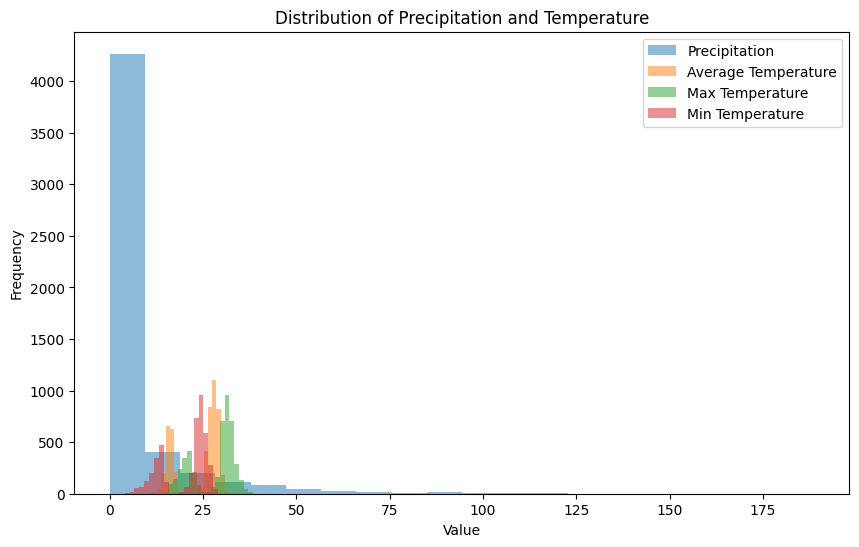

In [1269]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRCP'], bins=20, alpha=0.5, label='Precipitation')
plt.hist(data['TAVG'], bins=20, alpha=0.5, label='Average Temperature')
plt.hist(data['TMAX'], bins=20, alpha=0.5, label='Max Temperature')
plt.hist(data['TMIN'], bins=20, alpha=0.5, label='Min Temperature')
plt.title('Distribution of Precipitation and Temperature')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [1270]:
data.rename(columns={'NAME': 'Location Name'}, inplace=True)
data.rename(columns={'LATITUDE': 'Latitude'}, inplace=True)
data.rename(columns={'LONGITUDE': 'Longitude'}, inplace=True)
data.rename(columns={'ELEVATION': 'Elevation'}, inplace=True)
data.rename(columns={'PRCP': 'Precipitation'}, inplace=True)
data.rename(columns={'DATE': 'Current Date'}, inplace=True)
data.rename(columns={'TAVG': 'Average Temperature'}, inplace=True)
data.rename(columns={'TMAX': 'Maximum Temperature'}, inplace=True)
data.rename(columns={'TMIN': 'Minimum Temperature'}, inplace=True)

In [1271]:
data['Location Name'].unique()

array(['KURUNEGALA', 'COLOMBO', 'NUWARA ELIYA'], dtype=object)

In [1272]:
kurunegala_data = data[data['Location Name'] == 'KURUNEGALA']
colombo_data = data[data['Location Name'] == 'COLOMBO']
nuwaraeliya_data = data[data['Location Name'] == 'NUWARA ELIYA']

In [1273]:
kurunegala_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1704 entries, 0 to 1703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location Name        1704 non-null   object 
 1   Latitude             1704 non-null   float64
 2   Longitude            1704 non-null   float64
 3   Elevation            1704 non-null   float64
 4   Current Date         1704 non-null   object 
 5   Precipitation        1701 non-null   float64
 6   Average Temperature  1704 non-null   float64
 7   Maximum Temperature  1544 non-null   float64
 8   Minimum Temperature  1439 non-null   float64
dtypes: float64(7), object(2)
memory usage: 133.1+ KB


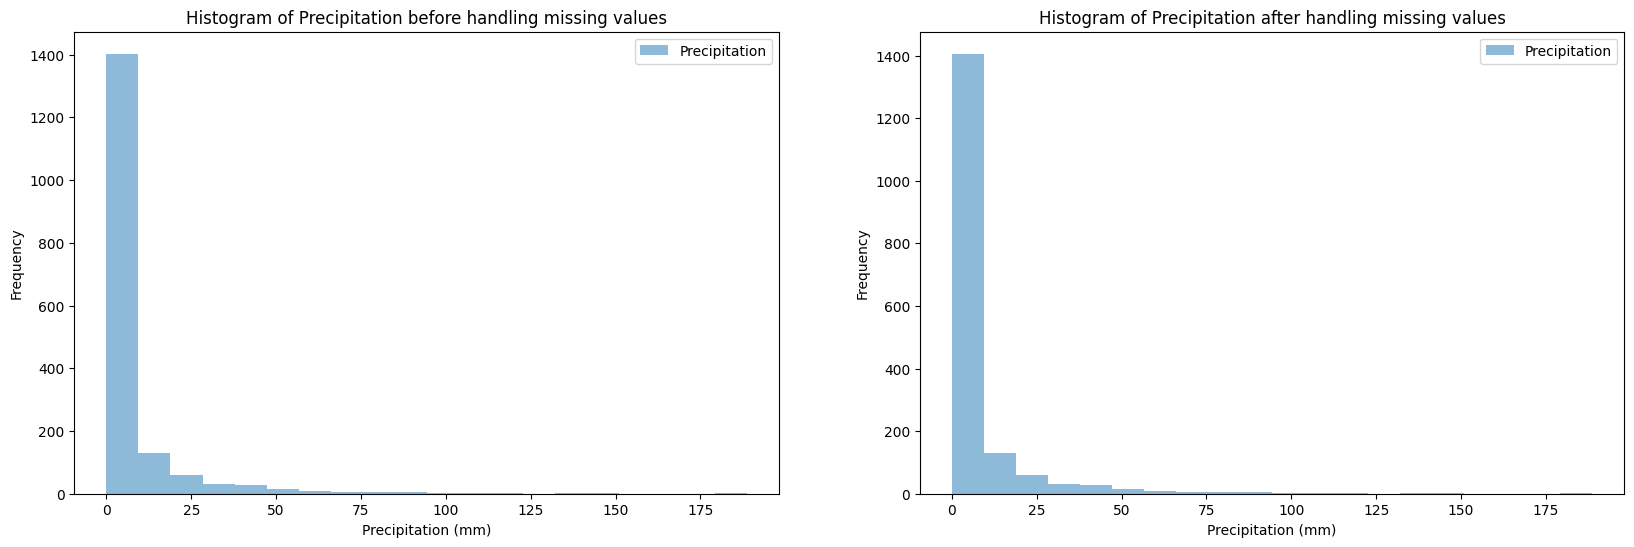

In [1274]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(kurunegala_data['Precipitation'], bins=20, alpha=0.5, label='Precipitation')
axes[0].set_xlabel('Precipitation (mm)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Precipitation before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = kurunegala_data['Precipitation'].mean()
kurunegala_data.loc[:, 'Precipitation'] = kurunegala_data['Precipitation'].fillna(mean)

# Plot the second histogram
axes[1].hist(kurunegala_data['Precipitation'], bins=20, alpha=0.5, label='Precipitation')
axes[1].set_xlabel('Precipitation (mm)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Precipitation after handling missing values')
axes[1].legend()

plt.show()

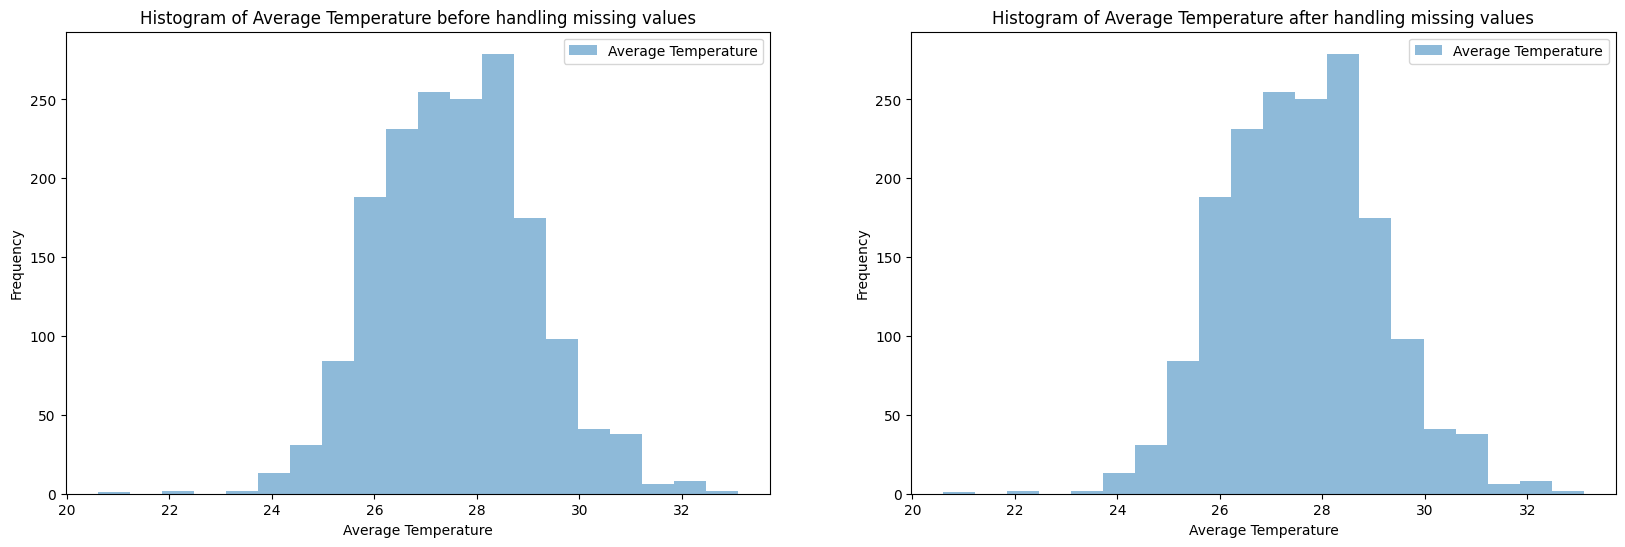

In [1275]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(kurunegala_data['Average Temperature'], bins=20, alpha=0.5, label='Average Temperature')
axes[0].set_xlabel('Average Temperature')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Average Temperature before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = kurunegala_data['Average Temperature'].mean()
kurunegala_data.loc[:, 'Average Temperature'] = kurunegala_data['Average Temperature'].fillna(mean)

# Plot the second histogram
axes[1].hist(kurunegala_data['Average Temperature'], bins=20, alpha=0.5, label='Average Temperature')
axes[1].set_xlabel('Average Temperature')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Average Temperature after handling missing values')
axes[1].legend()

plt.show()

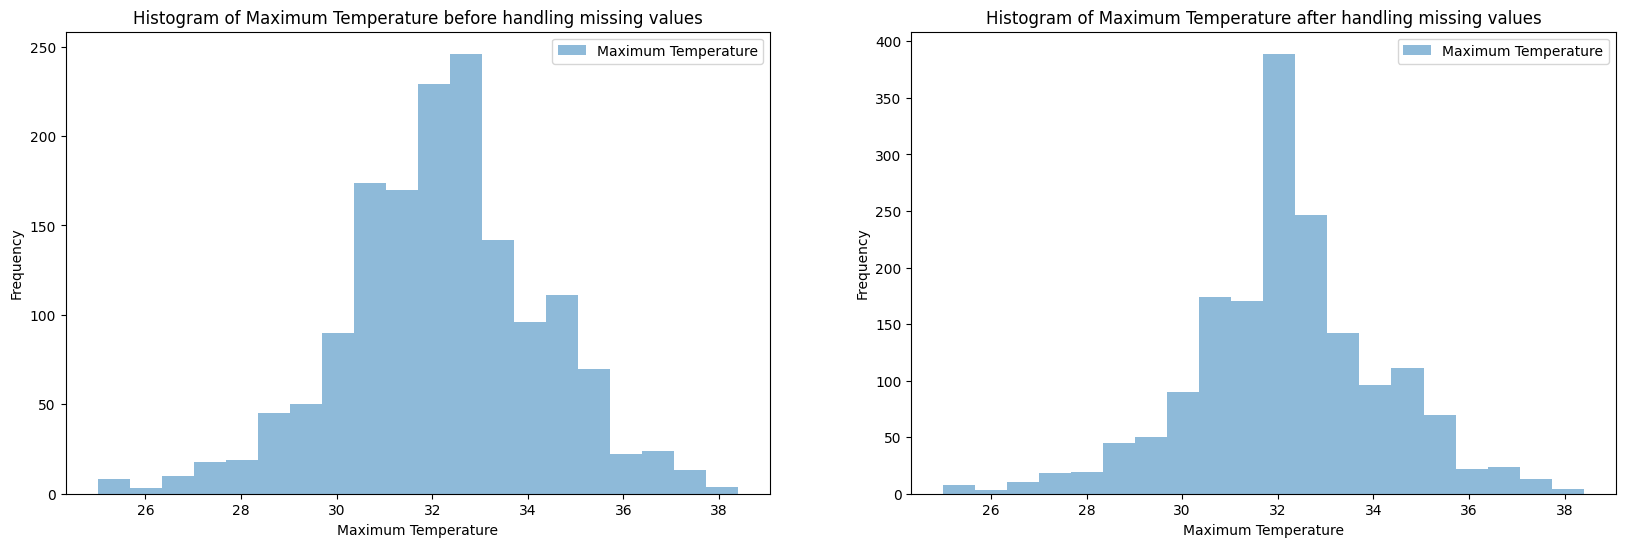

In [1276]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(kurunegala_data['Maximum Temperature'], bins=20, alpha=0.5, label='Maximum Temperature')
axes[0].set_xlabel('Maximum Temperature')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Maximum Temperature before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = kurunegala_data['Maximum Temperature'].mean()
kurunegala_data.loc[:, 'Maximum Temperature'] = kurunegala_data['Maximum Temperature'].fillna(mean)

# Plot the second histogram
axes[1].hist(kurunegala_data['Maximum Temperature'], bins=20, alpha=0.5, label='Maximum Temperature')
axes[1].set_xlabel('Maximum Temperature')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Maximum Temperature after handling missing values')
axes[1].legend()

plt.show()

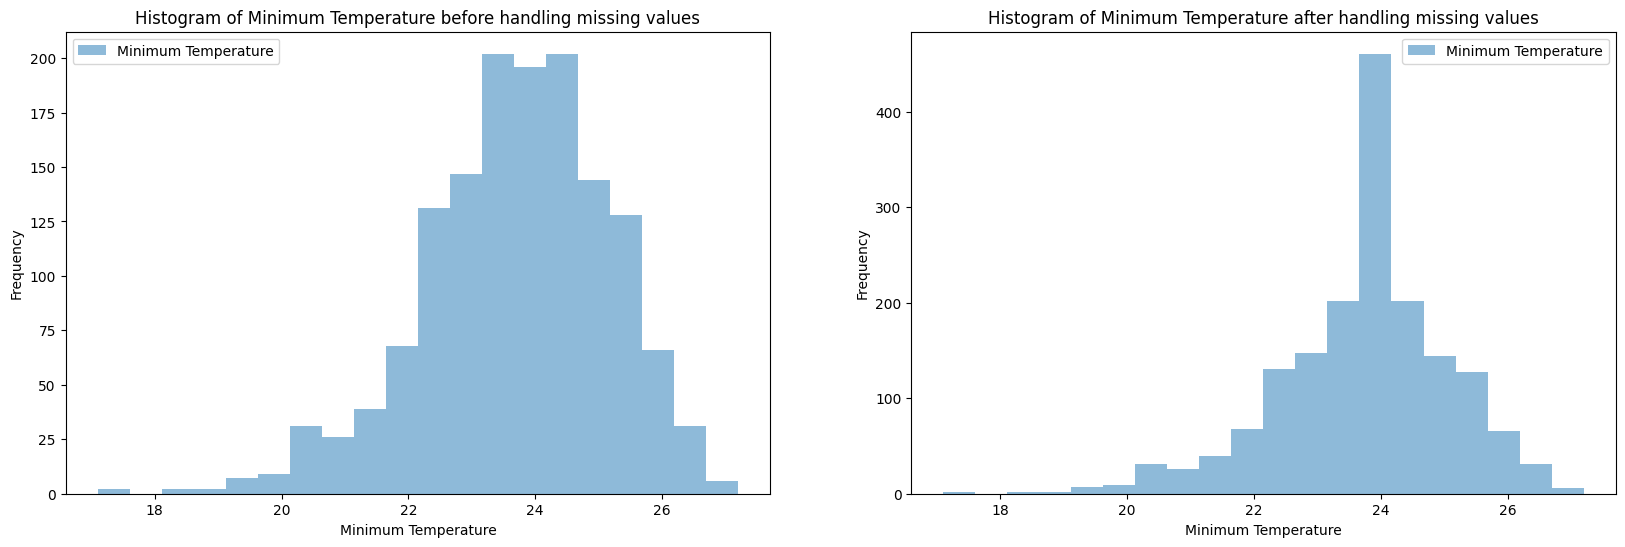

In [1277]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(kurunegala_data['Minimum Temperature'], bins=20, alpha=0.5, label='Minimum Temperature')
axes[0].set_xlabel('Minimum Temperature')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Minimum Temperature before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = kurunegala_data['Minimum Temperature'].mean()
kurunegala_data.loc[:, 'Minimum Temperature'] = kurunegala_data['Minimum Temperature'].fillna(mean)

# Plot the second histogram
axes[1].hist(kurunegala_data['Minimum Temperature'], bins=20, alpha=0.5, label='Minimum Temperature')
axes[1].set_xlabel('Minimum Temperature')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Minimum Temperature after handling missing values')
axes[1].legend()

plt.show()

In [1278]:
colombo_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1765 entries, 3464 to 5228
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location Name        1765 non-null   object 
 1   Latitude             1765 non-null   float64
 2   Longitude            1765 non-null   float64
 3   Elevation            1765 non-null   float64
 4   Current Date         1765 non-null   object 
 5   Precipitation        1756 non-null   float64
 6   Average Temperature  1765 non-null   float64
 7   Maximum Temperature  1556 non-null   float64
 8   Minimum Temperature  1448 non-null   float64
dtypes: float64(7), object(2)
memory usage: 137.9+ KB


In [1279]:
colombo_data.isnull().sum()

Location Name            0
Latitude                 0
Longitude                0
Elevation                0
Current Date             0
Precipitation            9
Average Temperature      0
Maximum Temperature    209
Minimum Temperature    317
dtype: int64

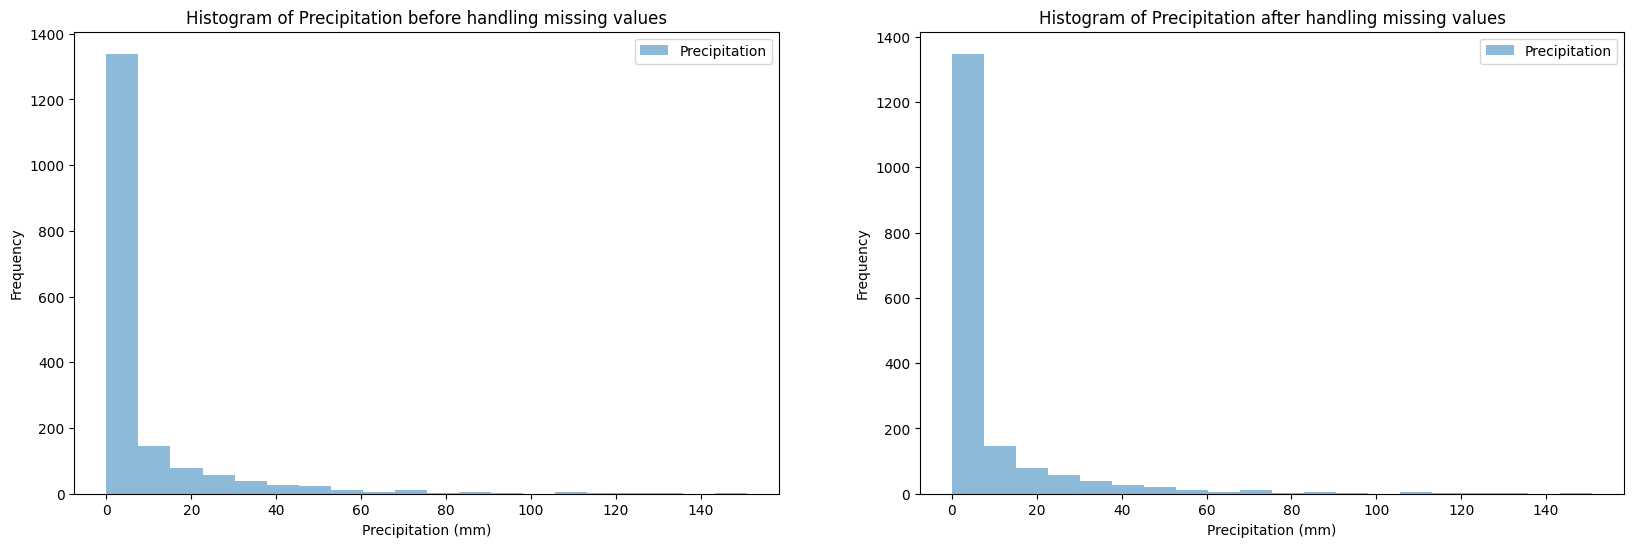

In [1280]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(colombo_data['Precipitation'], bins=20, alpha=0.5, label='Precipitation')
axes[0].set_xlabel('Precipitation (mm)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Precipitation before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = colombo_data['Precipitation'].mean()
colombo_data.loc[:, 'Precipitation'] = colombo_data['Precipitation'].fillna(mean)

# Plot the second histogram
axes[1].hist(colombo_data['Precipitation'], bins=20, alpha=0.5, label='Precipitation')
axes[1].set_xlabel('Precipitation (mm)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Precipitation after handling missing values')
axes[1].legend()

plt.show()

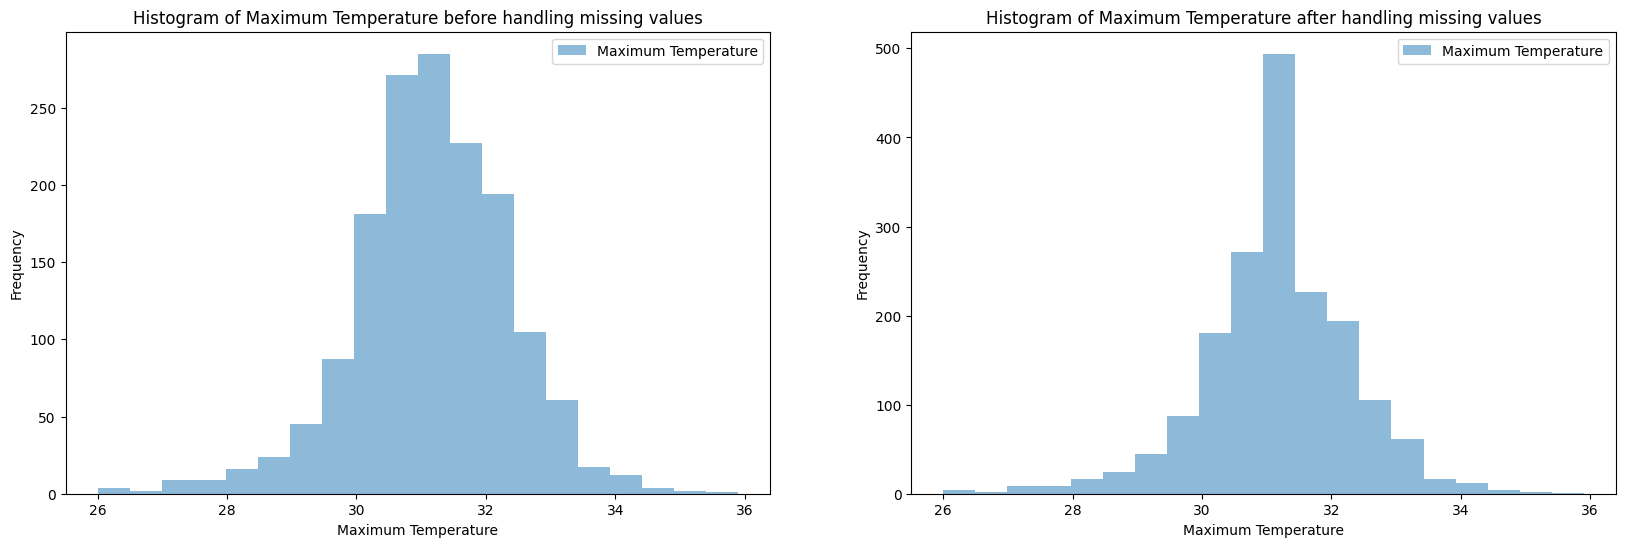

In [1281]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(colombo_data['Maximum Temperature'], bins=20, alpha=0.5, label='Maximum Temperature')
axes[0].set_xlabel('Maximum Temperature')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Maximum Temperature before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = colombo_data['Maximum Temperature'].mean()
colombo_data.loc[:, 'Maximum Temperature'] = colombo_data['Maximum Temperature'].fillna(mean)

# Plot the second histogram
axes[1].hist(colombo_data['Maximum Temperature'], bins=20, alpha=0.5, label='Maximum Temperature')
axes[1].set_xlabel('Maximum Temperature')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Maximum Temperature after handling missing values')
axes[1].legend()

plt.show()

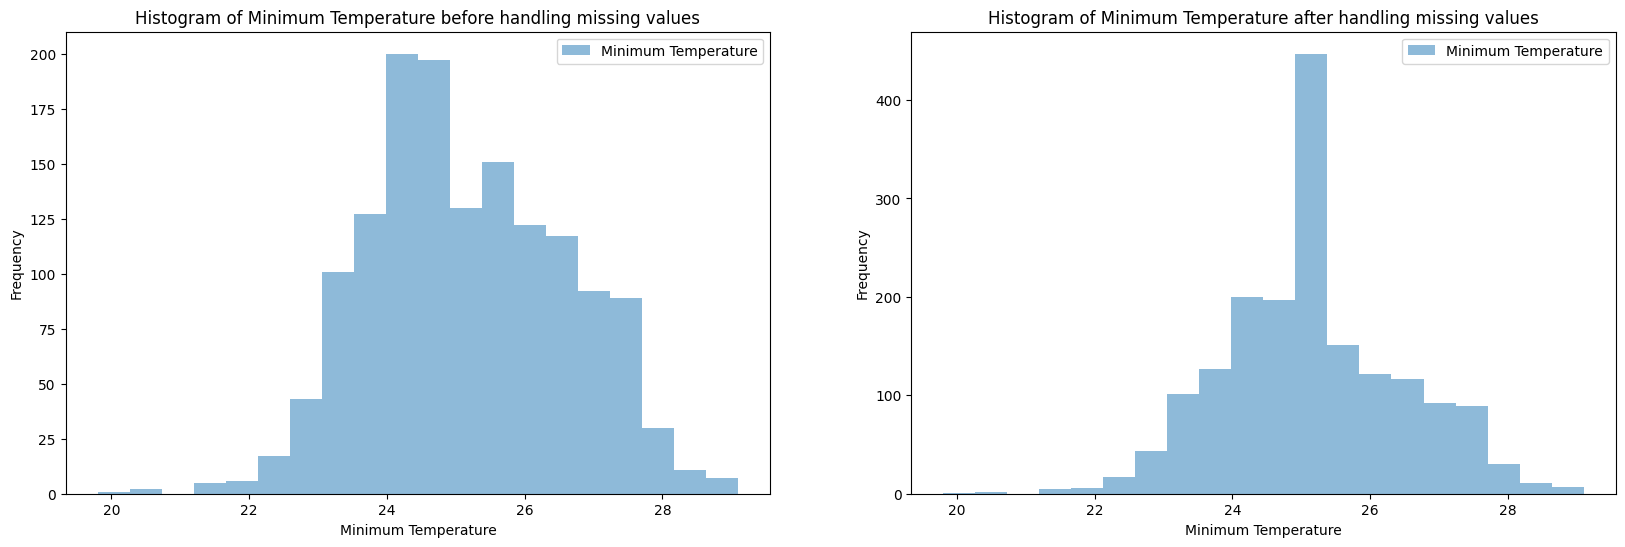

In [1282]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(colombo_data['Minimum Temperature'], bins=20, alpha=0.5, label='Minimum Temperature')
axes[0].set_xlabel('Minimum Temperature')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Minimum Temperature before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = colombo_data['Minimum Temperature'].mean()
colombo_data.loc[:, 'Minimum Temperature'] = colombo_data['Minimum Temperature'].fillna(mean)

# Plot the second histogram
axes[1].hist(colombo_data['Minimum Temperature'], bins=20, alpha=0.5, label='Minimum Temperature')
axes[1].set_xlabel('Minimum Temperature')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Minimum Temperature after handling missing values')
axes[1].legend()

plt.show()

In [1283]:
nuwaraeliya_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1761 entries, 5229 to 6989
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Location Name        1761 non-null   object 
 1   Latitude             1761 non-null   float64
 2   Longitude            1761 non-null   float64
 3   Elevation            1761 non-null   float64
 4   Current Date         1761 non-null   object 
 5   Precipitation        1756 non-null   float64
 6   Average Temperature  1761 non-null   float64
 7   Maximum Temperature  1547 non-null   float64
 8   Minimum Temperature  1417 non-null   float64
dtypes: float64(7), object(2)
memory usage: 137.6+ KB


In [1284]:
nuwaraeliya_data.isnull().sum()

Location Name            0
Latitude                 0
Longitude                0
Elevation                0
Current Date             0
Precipitation            5
Average Temperature      0
Maximum Temperature    214
Minimum Temperature    344
dtype: int64

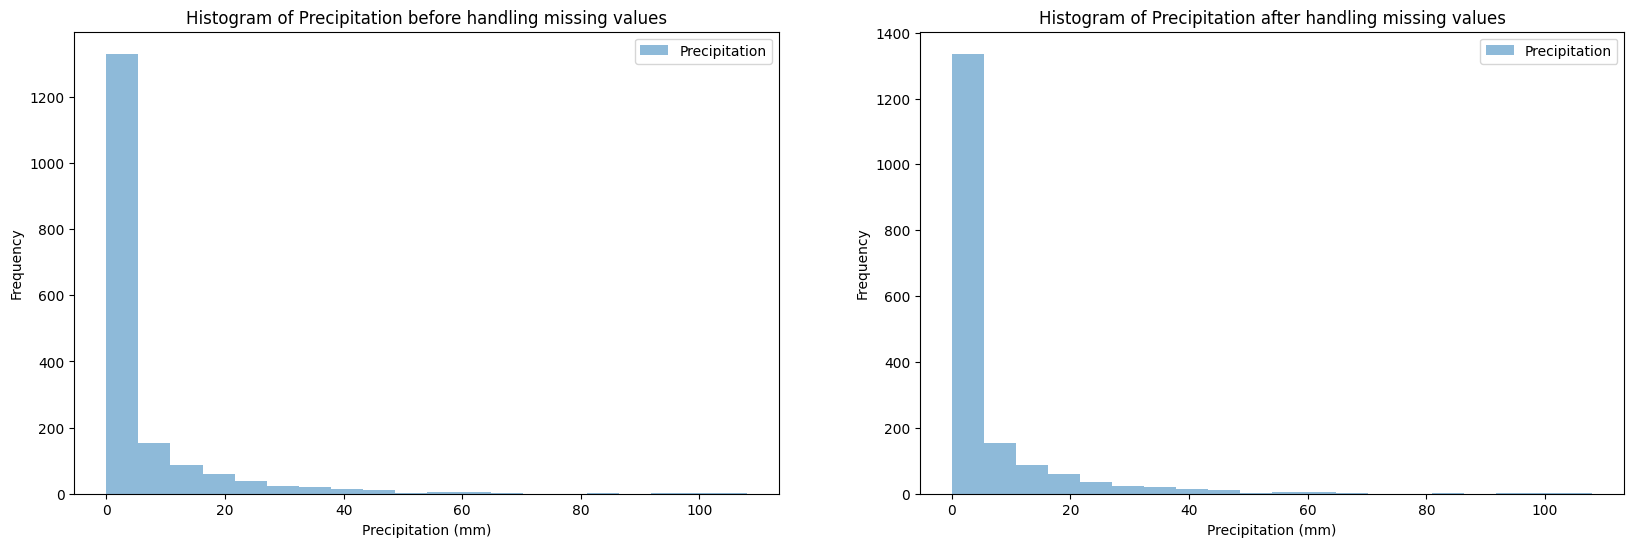

In [1285]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(nuwaraeliya_data['Precipitation'], bins=20, alpha=0.5, label='Precipitation')
axes[0].set_xlabel('Precipitation (mm)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Precipitation before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = nuwaraeliya_data['Precipitation'].mean()
nuwaraeliya_data.loc[:, 'Precipitation'] = nuwaraeliya_data['Precipitation'].fillna(mean)

# Plot the second histogram
axes[1].hist(nuwaraeliya_data['Precipitation'], bins=20, alpha=0.5, label='Precipitation')
axes[1].set_xlabel('Precipitation (mm)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Precipitation after handling missing values')
axes[1].legend()

plt.show()

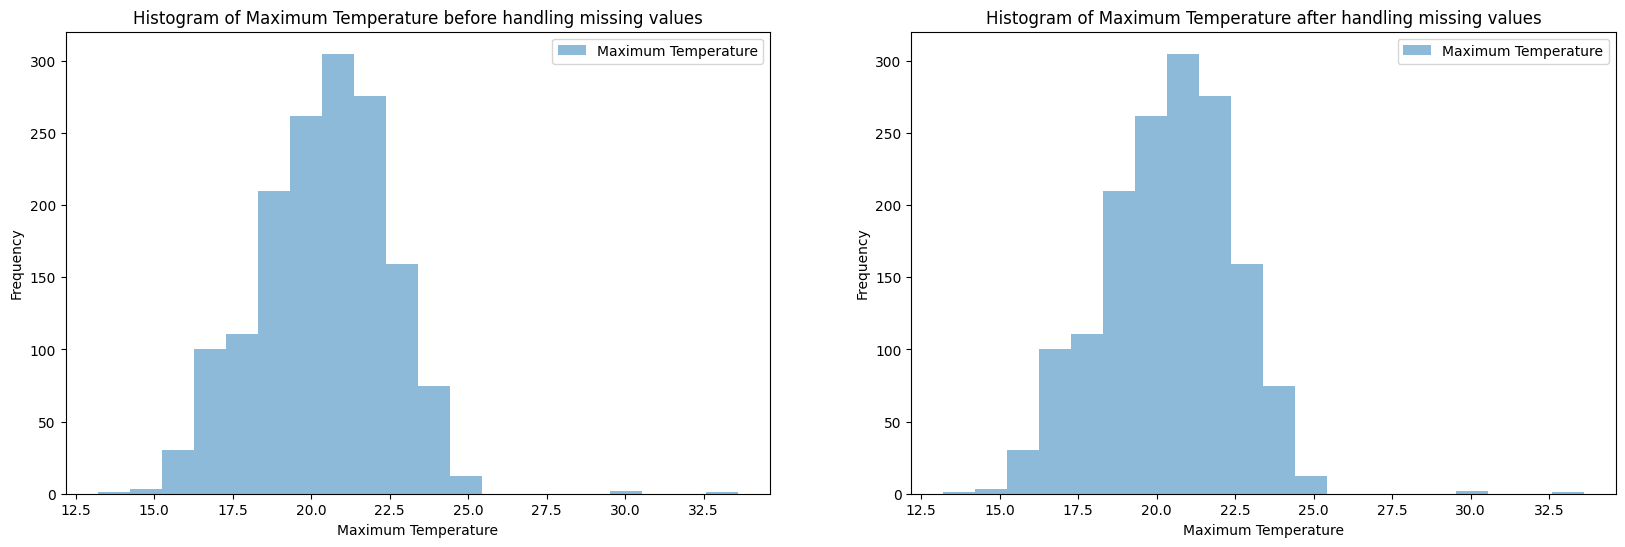

In [1286]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(nuwaraeliya_data['Maximum Temperature'], bins=20, alpha=0.5, label='Maximum Temperature')
axes[0].set_xlabel('Maximum Temperature')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Maximum Temperature before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = nuwaraeliya_data['Maximum Temperature'].mean()
kurunegala_data.loc[:, 'Maximum Temperature'] = kurunegala_data['Maximum Temperature'].fillna(mean)

# Plot the second histogram
axes[1].hist(nuwaraeliya_data['Maximum Temperature'], bins=20, alpha=0.5, label='Maximum Temperature')
axes[1].set_xlabel('Maximum Temperature')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Maximum Temperature after handling missing values')
axes[1].legend()

plt.show()

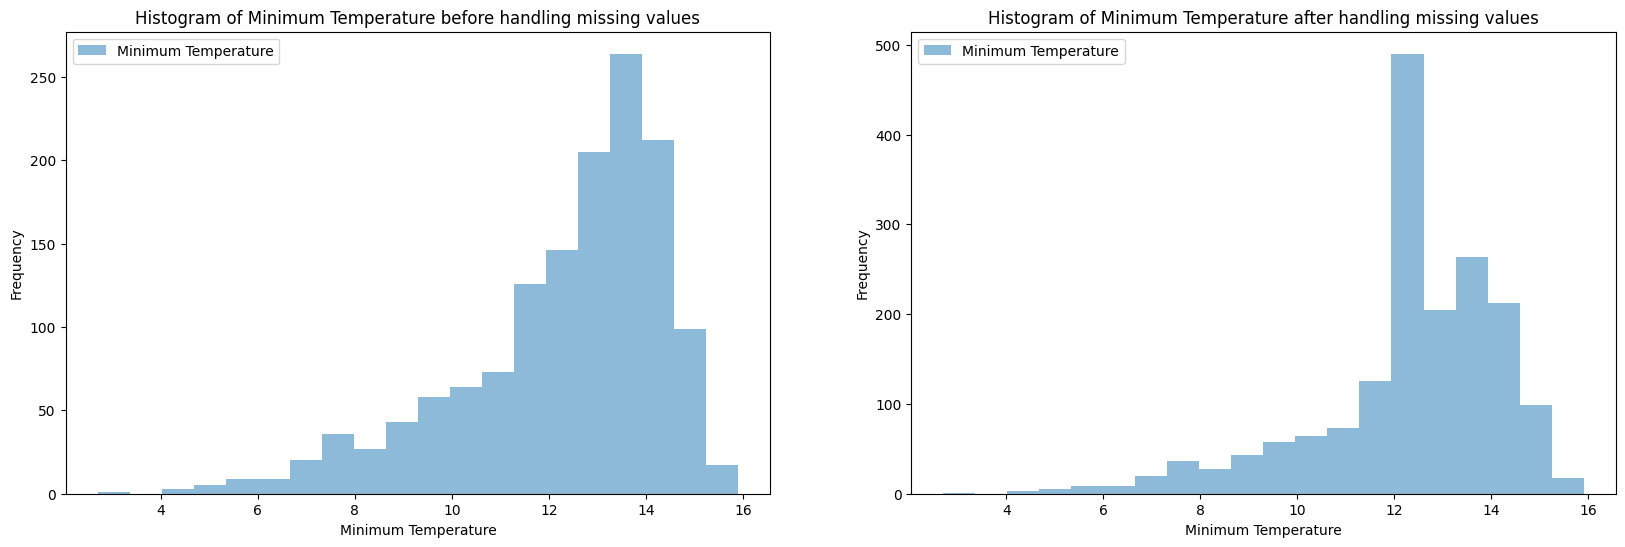

In [1287]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram
axes[0].hist(nuwaraeliya_data['Minimum Temperature'], bins=20, alpha=0.5, label='Minimum Temperature')
axes[0].set_xlabel('Minimum Temperature')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Minimum Temperature before handling missing values')
axes[0].legend()

# Calculate mean and fill missing values
mean = nuwaraeliya_data['Minimum Temperature'].mean()
nuwaraeliya_data.loc[:, 'Minimum Temperature'] = nuwaraeliya_data['Minimum Temperature'].fillna(mean)

# Plot the second histogram
axes[1].hist(nuwaraeliya_data['Minimum Temperature'], bins=20, alpha=0.5, label='Minimum Temperature')
axes[1].set_xlabel('Minimum Temperature')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of Minimum Temperature after handling missing values')
axes[1].legend()

plt.show()

In [1288]:
#colombo_data['PRCP_ATTRIBUTES'].unique()

In [1289]:
#colombo_data['PRCP_ATTRIBUTES'] = colombo_data['PRCP_ATTRIBUTES'].fillna(',,S')

In [1290]:
#colombo_data['TMIN_ATTRIBUTES'].unique()

In [1291]:
#colombo_data['TMIN_ATTRIBUTES'] = colombo_data['TMIN_ATTRIBUTES'].fillna(',,S')

In [1292]:
hcho_data = pd.read_csv('datasets/combined_data.csv')

In [1293]:
hcho_data['Location'].unique()

array(['NUWARA ELIYA', 'COLOMBO', 'DENIYAYA, MATARA', 'KANDY',
       'KURUNEGALA', 'BIBILE, MONARAGALA', 'JAFFNA'], dtype=object)

In [1294]:
hcho_nuwaraeliya = hcho_data[hcho_data['Location']=='NUWARA ELIYA']
hcho_colombo = hcho_data[hcho_data['Location']=='COLOMBO']
hcho_kurunegala = hcho_data[hcho_data['Location']=='KURUNEGALA']

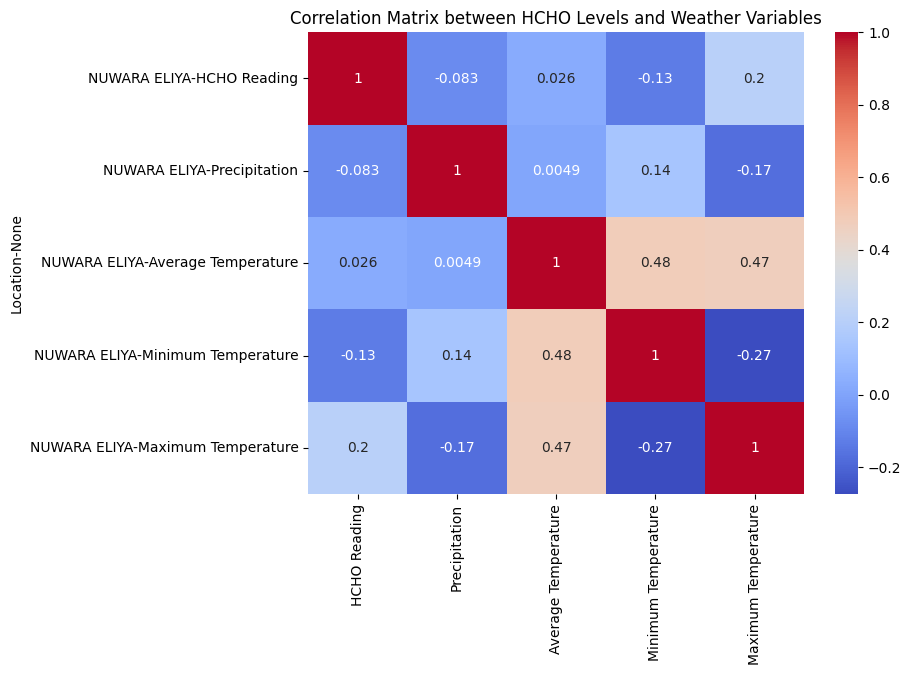

In [1295]:
nuwaraeliya_merged_data = pd.merge(hcho_nuwaraeliya, nuwaraeliya_data, on='Current Date', how='inner')
correlation_matrix = nuwaraeliya_merged_data.groupby('Location')[['HCHO Reading', 'Precipitation', 'Average Temperature', 'Minimum Temperature', 'Maximum Temperature']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables')
plt.show()

In [1296]:
nuwaraeliya_merged_data.head()

,HCHO Reading,Location,Current Date,Next Date,Location Name,Latitude,Longitude,Elevation,Precipitation,Average Temperature,Maximum Temperature,Minimum Temperature
0,0.000191,NUWARA ELIYA,2019-01-03,2019-01-04,NUWARA ELIYA,6.967,80.767,1880.0,0.0,15.1,21.8,9.600000
1,0.000051,NUWARA ELIYA,2019-01-04,2019-01-05,NUWARA ELIYA,6.967,80.767,1880.0,0.0,15.1,22.2,8.400000
2,0.000065,NUWARA ELIYA,2019-01-05,2019-01-06,NUWARA ELIYA,6.967,80.767,1880.0,0.0,12.6,20.2,12.304728
3,0.000090,NUWARA ELIYA,2019-01-06,2019-01-07,NUWARA ELIYA,6.967,80.767,1880.0,0.0,14.8,21.7,2.700000
4,0.000041,NUWARA ELIYA,2019-01-07,2019-01-08,NUWARA ELIYA,6.967,80.767,1880.0,0.0,14.8,21.2,7.900000


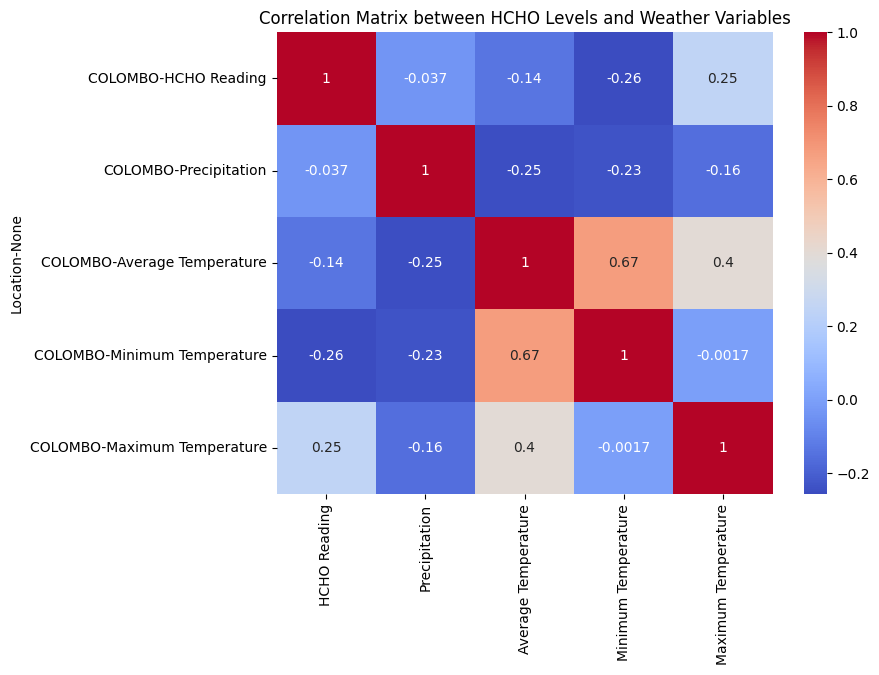

In [1297]:
colombo_merged_data = pd.merge(hcho_colombo, colombo_data, on='Current Date', how='inner')
correlation_matrix = colombo_merged_data.groupby('Location')[['HCHO Reading', 'Precipitation', 'Average Temperature', 'Minimum Temperature', 'Maximum Temperature']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables')
plt.show()

In [1298]:
colombo_merged_data.head()

,HCHO Reading,Location,Current Date,Next Date,Location Name,Latitude,Longitude,Elevation,Precipitation,Average Temperature,Maximum Temperature,Minimum Temperature
0,0.000197,COLOMBO,2019-01-01,2019-01-02,COLOMBO,6.9,79.867,7.0,0.0,27.5,31.70000,23.4
1,0.000263,COLOMBO,2019-01-02,2019-01-03,COLOMBO,6.9,79.867,7.0,0.0,25.8,31.16671,23.1
2,0.000099,COLOMBO,2019-01-03,2019-01-04,COLOMBO,6.9,79.867,7.0,0.0,27.1,32.10000,23.1
3,0.000210,COLOMBO,2019-01-04,2019-01-05,COLOMBO,6.9,79.867,7.0,0.0,27.1,32.60000,22.5
4,0.000179,COLOMBO,2019-01-05,2019-01-06,COLOMBO,6.9,79.867,7.0,0.0,27.2,32.30000,23.5


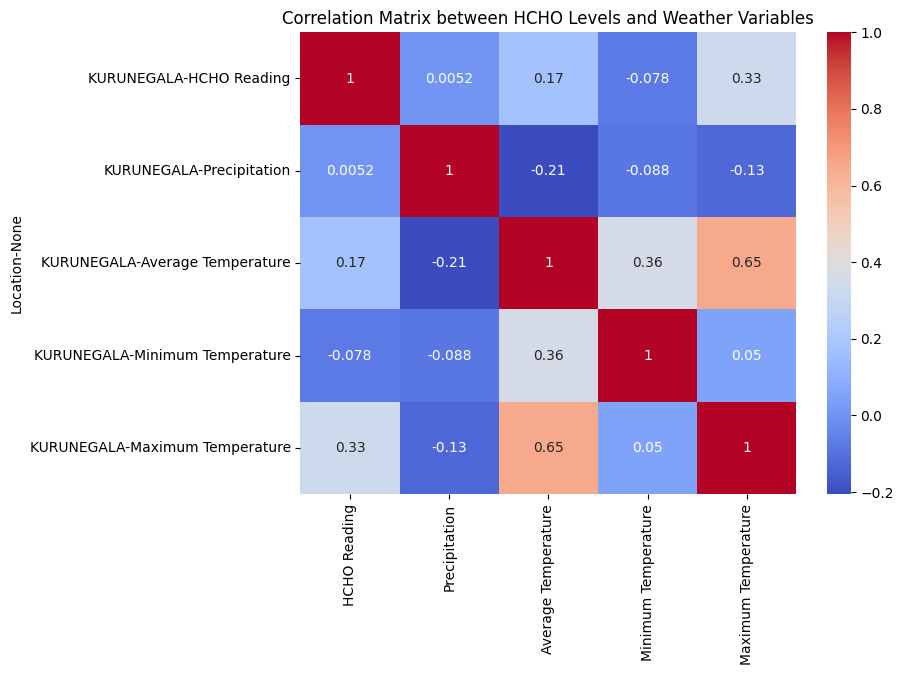

In [1299]:
kurunegala_merged_data = pd.merge(hcho_kurunegala, kurunegala_data, on='Current Date', how='inner')
correlation_matrix = kurunegala_merged_data.groupby('Location')[['HCHO Reading', 'Precipitation', 'Average Temperature', 'Minimum Temperature', 'Maximum Temperature']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix between HCHO Levels and Weather Variables')
plt.show()

In [1300]:
kurunegala_merged_data.head()

,HCHO Reading,Location,Current Date,Next Date,Location Name,Latitude,Longitude,Elevation,Precipitation,Average Temperature,Maximum Temperature,Minimum Temperature
0,0.000137,KURUNEGALA,2019-01-02,2019-01-03,KURUNEGALA,7.467,80.367,116.0,0.0,25.8,32.210427,22.2
1,0.000148,KURUNEGALA,2019-01-03,2019-01-04,KURUNEGALA,7.467,80.367,116.0,0.0,27.4,30.500000,21.9
2,-0.000002,KURUNEGALA,2019-01-04,2019-01-05,KURUNEGALA,7.467,80.367,116.0,0.0,28.4,31.100000,20.8
3,0.000249,KURUNEGALA,2019-01-05,2019-01-06,KURUNEGALA,7.467,80.367,116.0,0.0,28.7,32.100000,18.5
4,0.000102,KURUNEGALA,2019-01-06,2019-01-07,KURUNEGALA,7.467,80.367,116.0,0.0,28.0,31.000000,21.5


In [1301]:
final_dataset = pd.concat([nuwaraeliya_merged_data,colombo_merged_data,kurunegala_merged_data])
final_dataset = final_dataset.reset_index(drop=True)

In [1302]:
final_dataset.head()

,HCHO Reading,Location,Current Date,Next Date,Location Name,Latitude,Longitude,Elevation,Precipitation,Average Temperature,Maximum Temperature,Minimum Temperature
0,0.000191,NUWARA ELIYA,2019-01-03,2019-01-04,NUWARA ELIYA,6.967,80.767,1880.0,0.0,15.1,21.8,9.600000
1,0.000051,NUWARA ELIYA,2019-01-04,2019-01-05,NUWARA ELIYA,6.967,80.767,1880.0,0.0,15.1,22.2,8.400000
2,0.000065,NUWARA ELIYA,2019-01-05,2019-01-06,NUWARA ELIYA,6.967,80.767,1880.0,0.0,12.6,20.2,12.304728
3,0.000090,NUWARA ELIYA,2019-01-06,2019-01-07,NUWARA ELIYA,6.967,80.767,1880.0,0.0,14.8,21.7,2.700000
4,0.000041,NUWARA ELIYA,2019-01-07,2019-01-08,NUWARA ELIYA,6.967,80.767,1880.0,0.0,14.8,21.2,7.900000


In [1303]:
final_dataset.drop('Location Name', axis=1, inplace=True)

In [1304]:
final_dataset.head()

,HCHO Reading,Location,Current Date,Next Date,Latitude,Longitude,Elevation,Precipitation,Average Temperature,Maximum Temperature,Minimum Temperature
0,0.000191,NUWARA ELIYA,2019-01-03,2019-01-04,6.967,80.767,1880.0,0.0,15.1,21.8,9.600000
1,0.000051,NUWARA ELIYA,2019-01-04,2019-01-05,6.967,80.767,1880.0,0.0,15.1,22.2,8.400000
2,0.000065,NUWARA ELIYA,2019-01-05,2019-01-06,6.967,80.767,1880.0,0.0,12.6,20.2,12.304728
3,0.000090,NUWARA ELIYA,2019-01-06,2019-01-07,6.967,80.767,1880.0,0.0,14.8,21.7,2.700000
4,0.000041,NUWARA ELIYA,2019-01-07,2019-01-08,6.967,80.767,1880.0,0.0,14.8,21.2,7.900000


In [1305]:
#plt.figure(figsize=(10, 6))
#sns.regplot(data=colombo_merged_data, x='PRCP', y='HCHO Reading', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
#plt.title('HCHO Reading vs Precipitation (PRCP)')
#plt.xlabel('Precipitation (PRCP)')
#plt.ylabel('HCHO Reading')
#plt.grid(True)
#plt.show()

In [1306]:
#plt.figure(figsize=(10, 6))
#sns.regplot(data=colombo_merged_data, x='TAVG', y='HCHO Reading', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
#plt.title('HCHO Reading vs Average Temperature (TAVG)')
#plt.xlabel('Precipitation (PRCP)')
#plt.ylabel('HCHO Reading')
#plt.grid(True)
#plt.show()

In [1307]:
#plt.figure(figsize=(10, 6))
#sns.regplot(data=colombo_merged_data, x='TMAX', y='HCHO Reading', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
#plt.title('HCHO Reading vs Maximum Temperature (TMAX)')
#plt.xlabel('Precipitation (PRCP)')
#plt.ylabel('HCHO Reading')
#plt.grid(True)
#plt.show()

In [1308]:
#plt.figure(figsize=(10, 6))
#sns.regplot(data=colombo_merged_data, x='TMIN', y='HCHO Reading', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
#plt.title('HCHO Reading vs Minimum Temperature (TMIN)')
#plt.xlabel('Precipitation (PRCP)')
#plt.ylabel('HCHO Reading')
#plt.grid(True)
#plt.show()